### Árvore Filogenética 

In [1]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

Ler arquivo contendo Alinhamento Múltiplo

In [2]:
aln_GH33 = AlignIO.read("MSA_GH33.sth", "stockholm")

print(f"Alignment: \n {aln_GH33} \n ####################")

Alignment: 
 Alignment with 21 rows and 2138 columns
--------------------------------------------...--- Arcanobacterium_ihumii
--------------------------------------------...--- Arcanobacterium_bovis
--------------------------------------------...--- Arcanobacterium_pluranimalium
--------------------------------------------...--- Tessaracoccus_sp.
MSTPRARRGWSAFVALSATVALTVTPLTAWASPGETPPQPEPQA...RR- Actinotignum_timonense
-------------MALSATVALTVTPLTAWASPGETPPQPEPQA...RR- Actinotignum_sanguinis
MSTPRARRGWSAFVALSATVALTVTPLTAWASPGETPPQPEPQA...RR- Actinotignum_schaalii
--------------------------------------------...DRR Actinobaculum_massiliense
--------------------------------------------...--- Bifidobacterium_leontopitheci
--------------------------------------------...--- Schaalia_odontolytica
--------------------------------------------...--- Pauljensenia_sp.
--------------------------------------------...--- Isoptericola_variabilis
--------------------------------------------...--- Gard

Cálculo da matriz de distâncias a partir do alinhamento. Usando a matriz “blosum62”.

In [3]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(aln_GH33)
print(f"Distance matrix: \n{dm} \n ##########################")

Distance matrix: 
Arcanobacterium_ihumii  0.000000
Arcanobacterium_bovis   0.452704    0.000000
Arcanobacterium_pluranimalium   0.426743    0.218006    0.000000
Tessaracoccus_sp.   0.610510    0.612231    0.604868    0.000000
Actinotignum_timonense  0.636682    0.634527    0.644601    0.686794    0.000000
Actinotignum_sanguinis  0.638391    0.634430    0.641634    0.677558    0.060671    0.000000
Actinotignum_schaalii   0.634477    0.634948    0.643908    0.680965    0.048718    0.053652    0.000000
Actinobaculum_massiliense   0.616957    0.606778    0.619337    0.662113    0.481961    0.479579    0.484639    0.000000
Bifidobacterium_leontopitheci   0.678372    0.688661    0.687760    0.680261    0.718403    0.713962    0.712696    0.693083    0.000000
Schaalia_odontolytica   0.658814    0.647781    0.645769    0.634641    0.657159    0.660205    0.657610    0.698874    0.695872    0.000000
Pauljensenia_sp.    0.664000    0.655000    0.653609    0.638372    0.661250    0.663178    0.66

#### Cálculo da Árvore Filogenética 

Algoritmo UPGMA

In [4]:
constructor_GH33 = DistanceTreeConstructor()

upgmatree_GH33 = constructor_GH33.upgma(dm)

print(f"UPGMA tree: \n{upgmatree_GH33} \n ###################")

#salvar os arquivos 

Phylo.write(upgmatree_GH33, "upgma_gh33.nwk", "newick")

UPGMA tree: 
Tree(rooted=True)
    Clade(branch_length=0, name='Inner20')
        Clade(branch_length=0.0643121891549146, name='Inner19')
            Clade(branch_length=0.06184094638243881, name='Inner15')
                Clade(branch_length=0.0631695289894999, name='Inner14')
                    Clade(branch_length=0.036573937070894236, name='Inner10')
                        Clade(branch_length=0.019799633734233213, name='Inner9')
                            Clade(branch_length=0.21575485176298692, name='Inner1')
                                Clade(branch_length=0.004164187983343226, name='Bifidobacterium_longum')
                                Clade(branch_length=0.004164187983343226, name='Bifidobacterium_bifidum')
                            Clade(branch_length=0.21991903974633015, name='Bifidobacterium_canis')
                        Clade(branch_length=0.23971867348056336, name='Bifidobacterium_mongoliense')
                    Clade(branch_length=0.2597694225481252, name='I

1

Algorítmo Neighbor-Joining

In [5]:
njtree_GH33 = constructor_GH33.nj(dm)

print(f"NJ tree: \n{njtree_GH33} \n #########################")

#Salvar arquivo

Phylo.write(njtree_GH33, "nj.nwk_gh33", "newick")

NJ tree: 
Tree(rooted=False)
    Clade(branch_length=0, name='Inner19')
        Clade(branch_length=0.008316745745413412, name='Inner18')
            Clade(branch_length=0.009389653874699977, name='Inner17')
                Clade(branch_length=0.08334969075180898, name='Inner8')
                    Clade(branch_length=0.22113895843361103, name='Arcanobacterium_ihumii')
                    Clade(branch_length=0.10958151721922099, name='Inner7')
                        Clade(branch_length=0.11218885811805351, name='Arcanobacterium_pluranimalium')
                        Clade(branch_length=0.10581679388033166, name='Arcanobacterium_bovis')
                Clade(branch_length=0.3063183184846144, name='Tessaracoccus_sp.')
            Clade(branch_length=0.013229867928034572, name='Inner16')
                Clade(branch_length=0.01803272387111035, name='Inner15')
                    Clade(branch_length=0.014939528817983327, name='Inner14')
                        Clade(branch_length=0.24777

1

Ler as árvores pelo módulo Phylo 

In [6]:
import matplotlib.pyplot as plt 

UPGMA tree: 


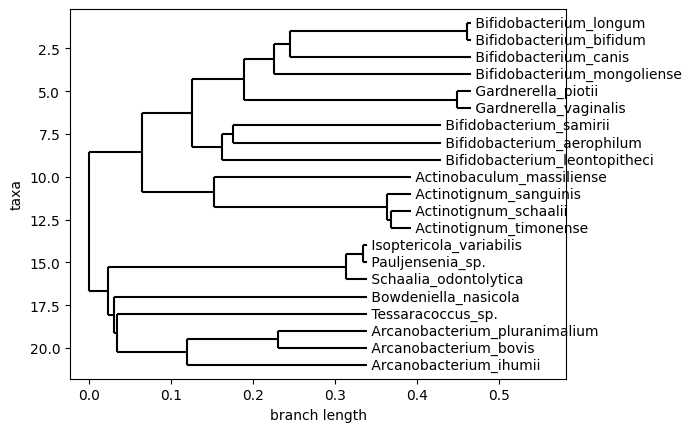

NJ tree: 


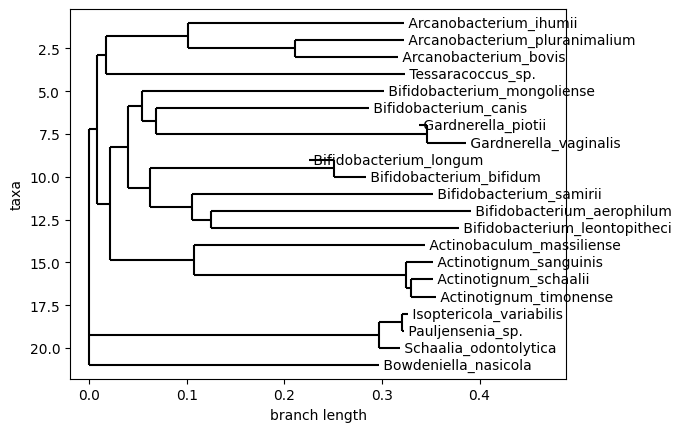

In [7]:
upgmatree_GH33 = Phylo.read("upgma_gh33.nwk", "newick")
njtree_GH33 = Phylo.read("nj.nwk_gh33", "newick")

for clade in upgmatree_GH33.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

for clade in njtree_GH33.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

print(f"UPGMA tree: ")
Phylo.draw(upgmatree_GH33)
print(f"NJ tree: ")
Phylo.draw(njtree_GH33)